# Setup

In [ ]:
!git clone https://github.com/neuspell/neuspell
%cd neuspell

Cloning into 'neuspell'...
remote: Enumerating objects: 653, done.
remote: Counting objects: 100% (456/456), done.
remote: Compressing objects: 100% (287/287), done.
remote: Total 653 (delta 280), reused 303 (delta 151), pack-reused 197
Receiving objects: 100% (653/653), 74.43 MiB | 22.48 MiB/s, done.
Resolving deltas: 100% (306/306), done.
/content/neuspell


In [ ]:
!pip install -e .

Obtaining file:///content/neuspell
     |████████████████████████████████| 2.1MB 5.5MB/s 
     |████████████████████████████████| 1.2MB 43.7MB/s 
     |████████████████████████████████| 133kB 43.1MB/s 
     |████████████████████████████████| 901kB 46.0MB/s 
     |████████████████████████████████| 3.3MB 42.8MB/s 
     |████████████████████████████████| 133kB 43.0MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 7.5MB 41.9MB/s 
ERROR: botocore 1.20.62 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.
  Running setup.py develop for neuspell


In [ ]:
!pip install urllib3==1.25.4

     |████████████████████████████████| 133kB 4.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
!pip install folium==0.2.1

     |████████████████████████████████| 71kB 3.5MB/s 
  Created wheel for folium: filename=folium-0.2.1-cp37-none-any.whl size=79979 sha256=fe85c6e3730b6b2aef507111732c43287772ae2545c927b93e699a0a2c6a78f5
  Stored in directory: /root/.cache/pip/wheels/b8/09/f0/52d2ef419c2aaf4fb149f92a33e0008bdce7ae816f0dd8f0c5
Successfully built folium
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [ ]:
!pip install -r extras-requirements.txt

Obtaining file:///content/neuspell (from -r extras-requirements.txt (line 1))
Obtaining file:///content/neuspell (from -r extras-requirements.txt (line 2))
     |████████████████████████████████| 522kB 5.5MB/s 
     |████████████████████████████████| 122kB 7.6MB/s 
     |████████████████████████████████| 266kB 8.2MB/s 
  Created wheel for overrides: filename=overrides-3.1.0-cp37-none-any.whl size=10174 sha256=4231385102ccc58960081444d105d7e536bafdf8f67cde5fea63e89da9c918ac
  Stored in directory: /root/.cache/pip/wheels/5c/24/13/6ef8600e6f147c95e595f1289a86a3cc82ed65df57582c65a9
  Created wheel for jsonnet: filename=jsonnet-0.17.0-cp37-cp37m-linux_x86_64.whl size=3388784 sha256=01eb8312cc2f1a4172eebe12b203c63296215b55194323bad47e4744b5587d43
  Stored in directory: /root/.cache/pip/wheels/26/7a/37/7dbcc30a6b4efd17b91ad1f0128b7bbf84813bd4e1cfb8c1e3
Successfully built overrides jsonnet
ERROR: allennlp 1.5.0 has requirement torch<1.8.0,>=1.6.0, but you'll have torch 1.8.1+cu101 which is inc

In [ ]:
!pip install torch==1.6.0

     |████████████████████████████████| 748.8MB 22kB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: allennlp 1.5.0 has requirement transformers<4.3,>=4.1, but you'll have transformers 4.5.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101


In [ ]:
!pip install transformers==4.1

     |████████████████████████████████| 1.5MB 4.1MB/s 
     |████████████████████████████████| 2.9MB 37.2MB/s 
  Found existing installation: tokenizers 0.10.2
    Uninstalling tokenizers-0.10.2:
      Successfully uninstalled tokenizers-0.10.2
  Found existing installation: transformers 4.5.1
    Uninstalling transformers-4.5.1:
      Successfully uninstalled transformers-4.5.1


In [ ]:
import neuspell

data folder is set to `/content/neuspell/neuspell/../data` script


In [ ]:
%cd data/traintest

import requests
import os

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

def create_paths(path_: str):
    if not os.path.exists(path_):
        os.makedirs(path_)
        print(f"{path_} created")
    else:
        print(f"{path_} already exists")


download_file_from_google_drive('1ZlEQKf3HMMk66F7DGFPnh-PA2cbt5K0F', 'test.1blm')
download_file_from_google_drive('1wZ6nrIYANNN3ZoHgacIg9P3UmHnBb9Wa', 'test.1blm.noise.prob')



download_file_from_google_drive('10VtrEThrDIiuFJf0gj4LeGDdP-y-yR--', 'test.bea60k')
download_file_from_google_drive('16AMIb6FVltgRR8xv8h7qacDUX8cOQK9d', 'test.bea60k.noise')

download_file_from_google_drive('1jHR2f3JwnskDphQcaTXr0hLlp60qJxUl', 'test.jfleg')
download_file_from_google_drive('1sccH7dRhyctKAIQXBZEBmUWEiTN_-o6q', 'test.jfleg.noise')



%cd /content/neuspell

/content/neuspell/data/traintest
/content/neuspell


# Train

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Library

In [ ]:
import torch
from torch import nn
from torch.nn.utils.rnn import pad_sequence
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import torch.nn.functional as F
import numpy as np

import time

from neuspell.seq_modeling.subwordbert import load_model
from neuspell.seq_modeling.helpers import load_data, train_validation_split, batch_accuracy_func
from neuspell.seq_modeling.helpers import get_tokens, progressBar
from neuspell.seq_modeling.helpers import batch_iter, labelize, tokenize, bert_tokenize_for_valid_examples

from neuspell.seq_modeling.subwordbert import model_inference

from neuspell.seq_modeling.helpers import load_vocab_dict, save_vocab_dict

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Load pretrained model and optimizer

In [ ]:
# load pretrained model

model_name = '.pt'

pretrained_vocab = load_vocab_dict('/content/drive/MyDrive/NLP/bert_vocab.pkl')

model = load_model(pretrained_vocab, "bert-base-cased")

model.load_state_dict(torch.load('/content/drive/MyDrive/NLP/'+model_name))

In [ ]:
# load pretrained optimizer

optimizer_name = '.pt'

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

optimizer.load_state_dict(torch.load('/content/drive/MyDrive/NLP/'+optimizer_name))

## Load data

In [ ]:
train_data = load_data('/content/neuspell/data/traintest/','test.1blm','test.1blm.noise.prob')

train_data, valid_data = train_validation_split(train_data, 0.90, seed=1)

vocab_ref = {}

vocab = get_tokens([i[0] for i in train_data],
                           keep_simple=True,
                           min_max_freq=(2,float("inf")),
                           topk=100000,
                           intersect=vocab_ref,
                           load_char_tokens=True)

test_data_60k = load_data('/content/neuspell/data/traintest/','test.bea60k','test.bea60k.noise')
test_data_jfleg = load_data('/content/neuspell/data/traintest/','test.jfleg','test.jfleg.noise')

273134it [00:00, 332205.99it/s]
273134it [00:00, 1177096.72it/s]
  0%|          | 0/245821 [00:00<?, ?it/s]

loaded tuples of (corr,incorr) examples from /content/neuspell/data/traintest/


100%|██████████| 245821/245821 [00:01<00:00, 133677.15it/s]


Total tokens found: 155272


  0%|          | 0/245821 [00:00<?, ?it/s]

Total tokens retained: 139243
Total tokens retained: 67965
Total tokens retained: 67965
loading character tokens


100%|██████████| 245821/245821 [00:01<00:00, 178314.94it/s]
0it [00:00, ?it/s]

number of unique chars found: 98
{'<<CHAR_UNK>>': 0, '<<CHAR_PAD>>': 1, '<<CHAR_START>>': 2, '<<CHAR_END>>': 3, 'H': 4, 'e': 5, ' ': 6, 'w': 7, 'a': 8, 's': 9, 'b': 10, 'r': 11, 'i': 12, 'f': 13, 'l': 14, 'y': 15, 'h': 16, 'o': 17, 'p': 18, 't': 19, 'z': 20, 'd': 21, 'n': 22, 'c': 23, 'k': 24, 'j': 25, 'u': 26, '.': 27, 'A': 28, 'm': 29, 'B': 30, 'g': 31, 'G': 32, 'M': 33, '3': 34, 'v': 35, ',': 36, '7': 37, '6': 38, '2': 39, 'T': 40, 'D': 41, 'S': 42, 'E': 43, '1': 44, '-': 45, 'x': 46, '4': 47, '9': 48, '(': 49, 'U': 50, 'P': 51, 'I': 52, ')': 53, "'": 54, ';': 55, 'q': 56, '"': 57, '?': 58, 'Y': 59, 'C': 60, 'O': 61, 'K': 62, 'L': 63, 'N': 64, 'R': 65, 'W': 66, '0': 67, '8': 68, 'J': 69, ':': 70, 'F': 71, '5': 72, '%': 73, 'V': 74, '/': 75, '$': 76, 'Z': 77, 'Q': 78, '!': 79, '[': 80, ']': 81, 'X': 82, '&': 83, '@': 84, '+': 85, '_': 86, '#': 87, '*': 88, '|': 89, '>': 90, '^': 91, '\\': 92, '=': 93, '<': 94, '~': 95, '{': 96, '}': 97}


63044it [00:00, 387875.10it/s]
63044it [00:00, 1254605.63it/s]
1601it [00:00, 246896.12it/s]
1601it [00:00, 1174170.43it/s]

loaded tuples of (corr,incorr) examples from /content/neuspell/data/traintest/
loaded tuples of (corr,incorr) examples from /content/neuspell/data/traintest/


## Load model and optimizer

In [ ]:
model = load_model(vocab,"bert-base-cased")
model = model.cuda()

VALID_BATCH_SIZE = 32

data_iter = batch_iter(train_data, batch_size=VALID_BATCH_SIZE, shuffle=False)

TRAIN_BATCH_SIZE = 32

DEVICE = 'cuda'

optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)

## Set epoch

In [ ]:
START_EPOCH = 1
N_EPOCHS = 8

## Training

epoch 6

bea60k: 

95.42 / 68.67

jfleg:

97.11 / 76.62


In epoch: 1
train_data size: 245821



Percent: [----------------------------->] 100% || batch_time: 0.3515 || batch_loss: 0.7226 || avg_batch_loss: 1.6205 || batch_acc: 0.0000 || avg_batch_acc: 0.0000 
Epoch 1 train_loss: 1.6204726105321667
valid_data size: 27313
Percent: [----------------------------->] 100% || batch_time: 0.0955 || batch_loss: 0.5670 || avg_batch_loss: 0.6494 || batch_acc: 0.9271 || avg_batch_acc: 0.9146 

0it [00:00, ?it/s]


Epoch 1 valid_loss: 0.6494434640614154
||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [05:33, 11.81it/s]
0it [00:00, ?it/s]


Epoch None valid_loss: 0.5549368462479226
total inference time for this data is: 333.778466 secs
###############################################


total token count: 1059069
_corr2corr:960196, _corr2incorr:28863, _incorr2corr:34058, _incorr2incorr:35952
accuracy is 0.9388000215283423
word correction rate is 0.48647336094843596
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:10,  9.92it/s]



Epoch None valid_loss: 0.39328646600836575
total inference time for this data is: 10.200278 secs
###############################################


total token count: 33473
_corr2corr:30806, _corr2incorr:657, _incorr2corr:1141, _incorr2incorr:869
accuracy is 0.9544110178352703
word correction rate is 0.5676616915422885
###############################################
In epoch: 2
train_data size: 245821
Percent: [----------------------------->] 100% || batch_time: 0.3510 || batch_loss: 0.3866 || avg_batch_loss: 0.5204 || batch_acc: 0.9254 || avg_batch_acc: 0.9254 
Epoch 2 train_loss: 0.520377221776464
valid_data size: 27313
Percent: [----------------------------->] 100% || batch_time: 0.0931 || batch_loss: 0.3252 || avg_batch_loss: 0.3423 || batch_acc: 0.9590 || avg_batch_acc: 0.9463 
Epoch 2 valid_loss: 0.3423312389634253


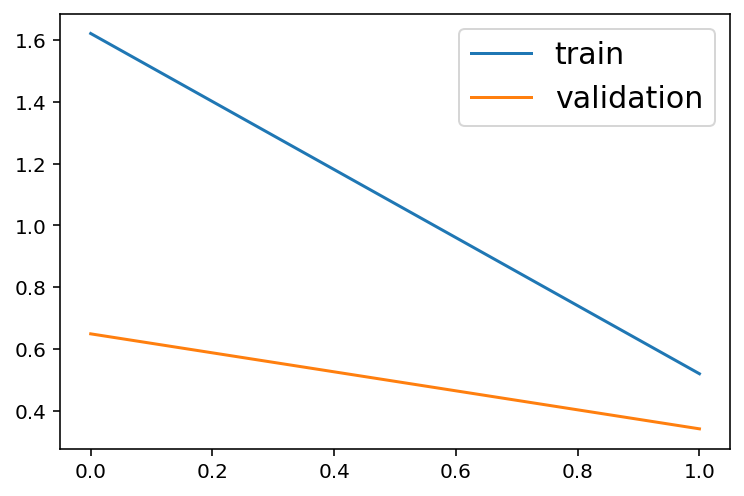

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [05:37, 11.66it/s]
1it [00:00,  9.99it/s]


Epoch None valid_loss: 0.39163027166945924
total inference time for this data is: 337.973157 secs
###############################################


total token count: 1059069
_corr2corr:959160, _corr2incorr:29899, _incorr2corr:43178, _incorr2incorr:26832
accuracy is 0.9464331408057455
word correction rate is 0.6167404656477646
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:10,  9.89it/s]



Epoch None valid_loss: 0.24456488259948125
total inference time for this data is: 10.227039 secs
###############################################


total token count: 33473
_corr2corr:30871, _corr2incorr:592, _incorr2corr:1441, _incorr2incorr:569
accuracy is 0.9653153287724434
word correction rate is 0.7169154228855721
###############################################
In epoch: 3
train_data size: 245821
Percent: [----------------------------->] 100% || batch_time: 0.3760 || batch_loss: 0.2379 || avg_batch_loss: 0.2765 || batch_acc: 0.9581 || avg_batch_acc: 0.9581 
Epoch 3 train_loss: 0.2765005253627799
valid_data size: 27313
Percent: [----------------------------->] 100% || batch_time: 0.0956 || batch_loss: 0.2578 || avg_batch_loss: 0.2415 || batch_acc: 0.9636 || avg_batch_acc: 0.9580 
Epoch 3 valid_loss: 0.24147433559006773


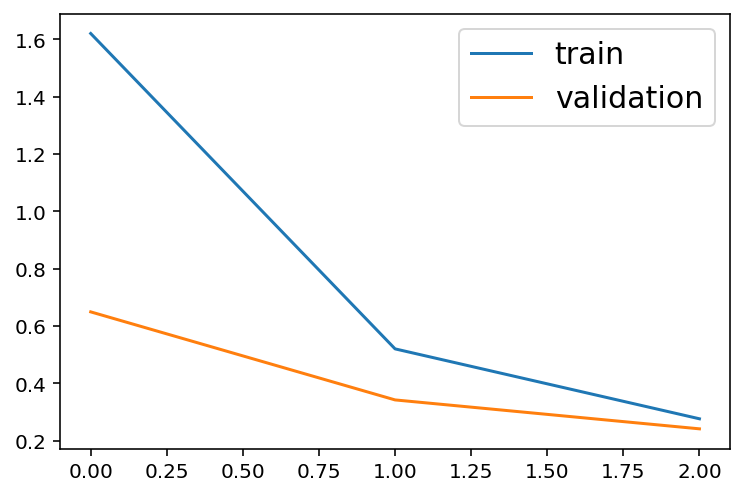

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [05:36, 11.70it/s]
1it [00:00,  9.79it/s]


Epoch None valid_loss: 0.358177154460358
total inference time for this data is: 336.745988 secs
###############################################


total token count: 1059069
_corr2corr:957477, _corr2incorr:31582, _incorr2corr:45724, _incorr2incorr:24286
accuracy is 0.947248007448051
word correction rate is 0.6531066990429939
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:10,  9.80it/s]



Epoch None valid_loss: 0.21904761705658224
total inference time for this data is: 10.318813 secs
###############################################


total token count: 33473
_corr2corr:30887, _corr2incorr:576, _incorr2corr:1498, _incorr2incorr:512
accuracy is 0.9674961909598782
word correction rate is 0.745273631840796
###############################################
In epoch: 4
train_data size: 245821
Percent: [----------------------------->] 100% || batch_time: 0.3663 || batch_loss: 0.2421 || avg_batch_loss: 0.1615 || batch_acc: 0.9784 || avg_batch_acc: 0.9784 
Epoch 4 train_loss: 0.16154274078601508
valid_data size: 27313
Percent: [----------------------------->] 100% || batch_time: 0.0965 || batch_loss: 0.2610 || avg_batch_loss: 0.1979 || batch_acc: 0.9636 || avg_batch_acc: 0.9640 
Epoch 4 valid_loss: 0.19794098252051048


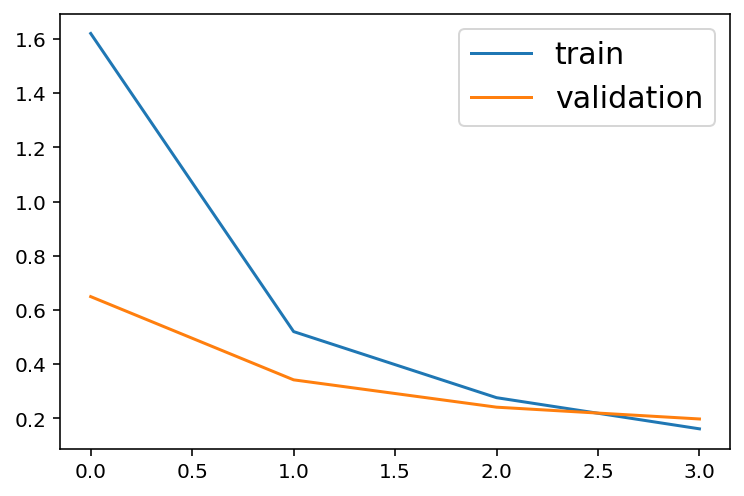

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [05:37, 11.69it/s]
0it [00:00, ?it/s]


Epoch None valid_loss: 0.3263068534797769
total inference time for this data is: 337.143420 secs
###############################################


total token count: 1059069
_corr2corr:960170, _corr2incorr:28889, _incorr2corr:47522, _incorr2incorr:22488
accuracy is 0.9514885243548815
word correction rate is 0.6787887444650764
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:10,  9.85it/s]



Epoch None valid_loss: 0.19491557507674293
total inference time for this data is: 10.272984 secs
###############################################


total token count: 33473
_corr2corr:30950, _corr2incorr:513, _incorr2corr:1548, _incorr2incorr:462
accuracy is 0.9708720461267291
word correction rate is 0.7701492537313432
###############################################
In epoch: 5
train_data size: 245821
Percent: [----------------------------->] 100% || batch_time: 0.4077 || batch_loss: 0.1049 || avg_batch_loss: 0.0977 || batch_acc: 0.9947 || avg_batch_acc: 0.9947 
Epoch 5 train_loss: 0.09769695512106628
valid_data size: 27313
Percent: [----------------------------->] 100% || batch_time: 0.0981 || batch_loss: 0.2587 || avg_batch_loss: 0.1816 || batch_acc: 0.9681 || avg_batch_acc: 0.9667 
Epoch 5 valid_loss: 0.18156722400869643


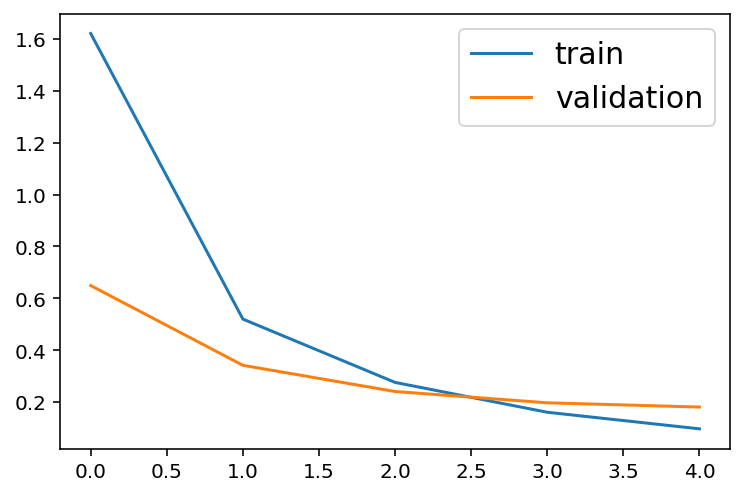

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [05:38, 11.64it/s]
0it [00:00, ?it/s]


Epoch None valid_loss: 0.36004851006190736
total inference time for this data is: 338.683369 secs
###############################################


total token count: 1059069
_corr2corr:959083, _corr2incorr:29976, _incorr2corr:47777, _incorr2incorr:22233
accuracy is 0.950702928704362
word correction rate is 0.6824310812741037
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:10,  9.77it/s]



Epoch None valid_loss: 0.22616200481015858
total inference time for this data is: 10.354418 secs
###############################################


total token count: 33473
_corr2corr:30953, _corr2incorr:510, _incorr2corr:1552, _incorr2incorr:458
accuracy is 0.9710811698981269
word correction rate is 0.7721393034825871
###############################################
In epoch: 6
train_data size: 245821
Percent: [----------------------------->] 100% || batch_time: 0.3797 || batch_loss: 0.0537 || avg_batch_loss: 0.0612 || batch_acc: 0.9961 || avg_batch_acc: 0.9961 
Epoch 6 train_loss: 0.061178428680044125
valid_data size: 27313
Percent: [----------------------------->] 100% || batch_time: 0.0976 || batch_loss: 0.2144 || avg_batch_loss: 0.1769 || batch_acc: 0.9727 || avg_batch_acc: 0.9682 
Epoch 6 valid_loss: 0.17690138750877538


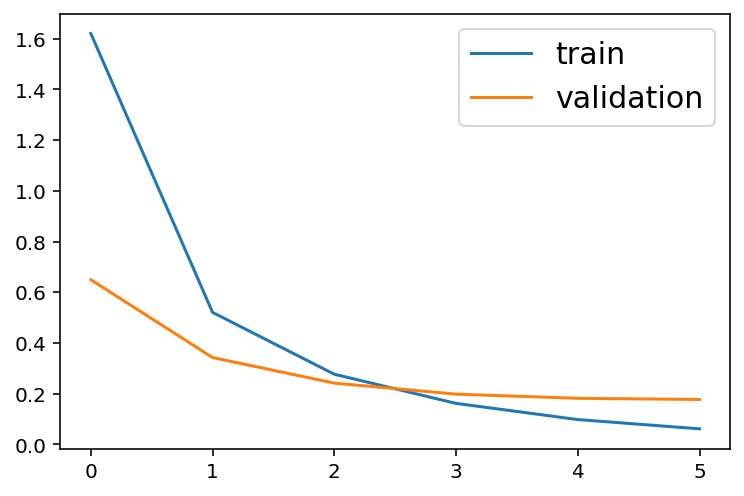

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [05:41, 11.54it/s]
1it [00:00,  9.74it/s]


Epoch None valid_loss: 0.33034414294088604
total inference time for this data is: 341.455606 secs
###############################################


total token count: 1059069
_corr2corr:962478, _corr2incorr:26581, _incorr2corr:48073, _incorr2incorr:21937
accuracy is 0.9541880651780007
word correction rate is 0.6866590487073275
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:10,  9.69it/s]



Epoch None valid_loss: 0.21104095741590062
total inference time for this data is: 10.448040 secs
###############################################


total token count: 33473
_corr2corr:30965, _corr2incorr:498, _incorr2corr:1540, _incorr2incorr:470
accuracy is 0.9710811698981269
word correction rate is 0.7661691542288557
###############################################
In epoch: 7
train_data size: 245821
Percent: [----------------------------->] 100% || batch_time: 0.3583 || batch_loss: 0.0511 || avg_batch_loss: 0.0403 || batch_acc: 0.9987 || avg_batch_acc: 0.9987 
Epoch 7 train_loss: 0.04033114701806258
valid_data size: 27313
Percent: [----------------------------->] 100% || batch_time: 0.0931 || batch_loss: 0.2777 || avg_batch_loss: 0.1810 || batch_acc: 0.9727 || avg_batch_acc: 0.9688 
Epoch 7 valid_loss: 0.18099968137974204


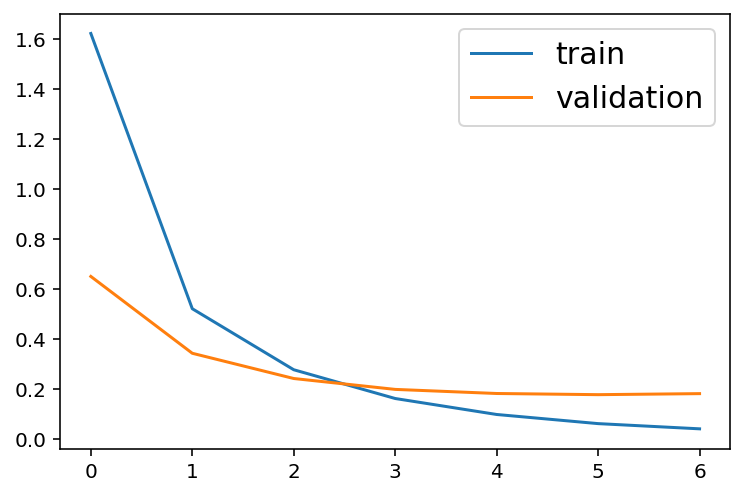

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [05:41, 11.54it/s]
1it [00:00,  9.73it/s]


Epoch None valid_loss: 0.36974643247021965
total inference time for this data is: 341.535569 secs
###############################################


total token count: 1059069
_corr2corr:960474, _corr2incorr:28585, _incorr2corr:48142, _incorr2incorr:21868
accuracy is 0.952360988755218
word correction rate is 0.687644622196829
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:10,  9.65it/s]



Epoch None valid_loss: 0.23135639950264208
total inference time for this data is: 10.480414 secs
###############################################


total token count: 33473
_corr2corr:30987, _corr2incorr:476, _incorr2corr:1546, _incorr2incorr:464
accuracy is 0.9719176649837182
word correction rate is 0.7691542288557214
###############################################
In epoch: 8
train_data size: 245821
Percent: [----------------------------->] 100% || batch_time: 0.3575 || batch_loss: 0.0258 || avg_batch_loss: 0.0293 || batch_acc: 0.9974 || avg_batch_acc: 0.9974 
Epoch 8 train_loss: 0.029256171339141306
valid_data size: 27313
Percent: [----------------------------->] 100% || batch_time: 0.0982 || batch_loss: 0.2921 || avg_batch_loss: 0.1861 || batch_acc: 0.9727 || avg_batch_acc: 0.9687 
Epoch 8 valid_loss: 0.18612424135906078


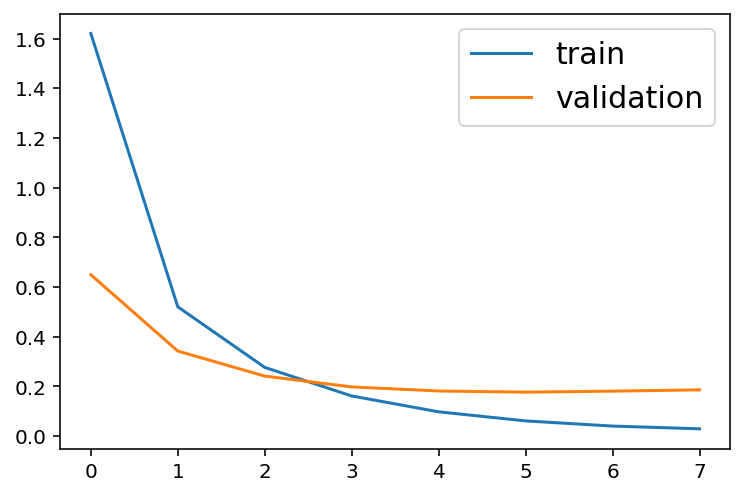

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [05:39, 11.61it/s]
1it [00:00,  9.93it/s]


Epoch None valid_loss: 0.3746917314342521
total inference time for this data is: 339.556291 secs
###############################################


total token count: 1059069
_corr2corr:961876, _corr2incorr:27183, _incorr2corr:47497, _incorr2incorr:22513
accuracy is 0.9530757674901258
word correction rate is 0.6784316526210541
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:10,  9.75it/s]


Epoch None valid_loss: 0.21890140196774155
total inference time for this data is: 10.375148 secs
###############################################


total token count: 33473
_corr2corr:31069, _corr2incorr:394, _incorr2corr:1571, _incorr2incorr:439
accuracy is 0.9751142712036567
word correction rate is 0.781592039800995
###############################################


In [ ]:
MODEL_NAME = 'bert_5e-5'

total_train_loss = []
total_val_loss = []

# train and eval
for epoch_id in range(START_EPOCH,N_EPOCHS+1):

    print(f"In epoch: {epoch_id}")

    # train loss and backprop
    train_loss = 0.
    train_acc = 0.
    train_acc_count = 0.
    print("train_data size: {}".format(len(train_data)))
    
    train_data_iter = batch_iter(train_data, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
    nbatches = int(np.ceil(len(train_data)/TRAIN_BATCH_SIZE))


    for batch_id, (batch_labels,batch_sentences) in enumerate(train_data_iter):
      
        optimizer.zero_grad()
        st_time = time.time()

        # set batch data for bert
        batch_labels_, batch_sentences_, batch_bert_inp, batch_bert_splits = bert_tokenize_for_valid_examples(batch_labels,batch_sentences)                
        if len(batch_labels_)==0:
            print("################")
            print("Not training the following lines due to pre-processing mismatch: \n")
            print([(a,b) for a,b in zip(batch_labels,batch_sentences)])
            print("################")
            continue
        else:
            batch_labels, batch_sentences = batch_labels_, batch_sentences_

        batch_bert_inp = {k:v.to(DEVICE) for k,v in batch_bert_inp.items()}

        # set batch data for others
        batch_labels, batch_lengths = labelize(batch_labels, vocab)
        batch_lengths = batch_lengths.to(DEVICE)
        batch_labels = batch_labels.to(DEVICE)

        # forward
        model.train()
        
        loss = model(batch_bert_inp, batch_bert_splits, targets=batch_labels)
        
        batch_loss = loss.cpu().detach().numpy()
        train_loss += batch_loss

        # backward
        loss.backward()

        optimizer.step()

        """
        # backward
        if GRADIENT_ACC > 1:
            loss = loss / GRADIENT_ACC

        loss.backward()
        # step
        if (batch_id + 1) % GRADIENT_ACC == 0 or batch_id >= nbatches - 1:
            # torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            # scheduler.step()
            optimizer.zero_grad()
        """
        # compute accuracy in numpy
        if batch_id%10000==0:

            train_acc_count += 1

            model.eval()
            with torch.no_grad():
                _, batch_predictions = model(batch_bert_inp, batch_bert_splits, targets=batch_labels)

            model.train()

            batch_labels = batch_labels.cpu().detach().numpy()
            batch_lengths = batch_lengths.cpu().detach().numpy()
            ncorr,ntotal = batch_accuracy_func(batch_predictions,batch_labels,batch_lengths)
            batch_acc = ncorr/ntotal
            train_acc += batch_acc     

        # update progress
        progressBar(batch_id+1,
                    int(np.ceil(len(train_data) / TRAIN_BATCH_SIZE)), 
                    ["batch_time","batch_loss","avg_batch_loss","batch_acc","avg_batch_acc"],
                    [time.time()-st_time,batch_loss,train_loss/(batch_id+1),batch_acc,train_acc/train_acc_count]) 
    
    print(f"\nEpoch {epoch_id} train_loss: {train_loss/(batch_id+1)}")

    mean_batch_loss = train_loss / nbatches
    total_train_loss.append(mean_batch_loss)


    # save model and optimizer every epoch
    model_name = MODEL_NAME + "_epoch_" + str(epoch_id) + '.pt'
    torch.save(model.state_dict(), 
            '/content/drive/MyDrive/NLP/'+model_name)
    
    # save optimizer
    optimizer_name = MODEL_NAME + "_optimizer_epoch_" + str(epoch_id) + '.pt'
    torch.save(optimizer.state_dict(), 
        '/content/drive/MyDrive/NLP/'+optimizer_name)

    # valid loss
    valid_loss = 0.
    valid_acc = 0.
    print("valid_data size: {}".format(len(valid_data)))

    valid_data_iter = batch_iter(valid_data, batch_size=VALID_BATCH_SIZE, shuffle=False)
    val_nbatches = int(np.ceil(len(valid_data)/VALID_BATCH_SIZE))

    for batch_id, (batch_labels,batch_sentences) in enumerate(valid_data_iter):

        st_time = time.time()
        # set batch data for bert
        # batch_labels_, batch_sentences_, batch_bert_inp, batch_bert_splits = bert_tokenize_for_valid_examples(batch_labels,batch_sentences)

        batch_labels, batch_sentences, batch_bert_inp, batch_bert_splits = bert_tokenize_for_valid_examples(batch_labels,batch_sentences)
        """
        if len(batch_labels_)==0:
            print("################")
            print("Not validating the following lines due to pre-processing mismatch: \n")
            print([(a,b) for a,b in zip(batch_labels,batch_sentences)])
            print("################")
            continue
        else:
        
            batch_labels, batch_sentences = batch_labels_, batch_sentences_
        """

        batch_bert_inp = {k:v.to(DEVICE) for k,v in batch_bert_inp.items()}


        # set batch data for others
        batch_labels, batch_lengths = labelize(batch_labels, vocab)
        batch_lengths = batch_lengths.to(DEVICE)
        batch_labels = batch_labels.to(DEVICE)

        # forward
        model.eval()
        with torch.no_grad():
            batch_loss, batch_predictions = model(batch_bert_inp, batch_bert_splits, targets=batch_labels)
        model.train()        
        valid_loss += batch_loss
        # compute accuracy in numpy
        batch_labels = batch_labels.cpu().detach().numpy()
        batch_lengths = batch_lengths.cpu().detach().numpy()
        ncorr,ntotal = batch_accuracy_func(batch_predictions,batch_labels,batch_lengths)
        batch_acc = ncorr/ntotal
        valid_acc += batch_acc
        # update progress
        progressBar(batch_id+1,
                    int(np.ceil(len(valid_data) / VALID_BATCH_SIZE)), 
                    ["batch_time","batch_loss","avg_batch_loss","batch_acc","avg_batch_acc"], 
                    [time.time()-st_time,batch_loss,valid_loss/(batch_id+1),batch_acc,valid_acc/(batch_id+1)])

    print(f"\nEpoch {epoch_id} valid_loss: {valid_loss/(batch_id+1)}")

    mean_val_loss = valid_loss / val_nbatches
    total_val_loss.append(mean_val_loss)
    
    if epoch_id >= 2:
        plt.figure(epoch_id)
        plt.plot(total_train_loss, label='train')
        plt.plot(total_val_loss, label='validation')
        plt.legend(fontsize=15)
        plt.show()
    
        
    print("||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||")
    
    predicted_result = model_inference(model, test_data_60k, 1, DEVICE, 16, vocab)

    print("||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||")

    predicted_result = model_inference(model, test_data_jfleg, 1, DEVICE, 16, vocab)
  

### Evaluation

### load earlier model in case of overfitting

In [ ]:
# load pretrained model

model_name = '.pt'

pretrained_vocab = load_vocab_dict('/content/drive/MyDrive/NLP/bert_vocab.pkl')

pretrained_model = load_model(pretrained_vocab, "bert-base-cased")

pretrained_model.load_state_dict(torch.load('/content/drive/MyDrive/NLP/'+model_name))

In [ ]:
from neuspell.seq_modeling.subwordbert import model_inference

test_data = load_data('/content/neuspell/data/traintest/','test.bea60k','test.bea60k.noise')

predicted_result = model_inference(model, test_data, 1, DEVICE, 16, vocab)

63044it [00:00, 411344.32it/s]
63044it [00:00, 1334371.36it/s]
0it [00:00, ?it/s]

loaded tuples of (corr,incorr) examples from /content/neuspell/data/traintest/
###############################################
data size: 63044


3941it [03:35, 18.28it/s]


Epoch None valid_loss: 0.386014152399532
total inference time for this data is: 215.651652 secs
###############################################


total token count: 1059069
_corr2corr:964318, _corr2incorr:24741, _incorr2corr:41801, _incorr2incorr:28209
accuracy is 0.9500032575781181
word correction rate is 0.5970718468790173
###############################################


In [ ]:
test_data = load_data('/content/neuspell/data/traintest/','test.jfleg','test.jfleg.noise')

predicted_result = model_inference(model, test_data, 1, DEVICE, 16, vocab)

1601it [00:00, 363016.58it/s]
1601it [00:00, 515118.19it/s]
2it [00:00, 17.21it/s]

loaded tuples of (corr,incorr) examples from /content/neuspell/data/traintest/
###############################################
data size: 1601


101it [00:06, 15.47it/s]


Epoch None valid_loss: 0.24303555451702363
total inference time for this data is: 6.540875 secs
###############################################


total token count: 33473
_corr2corr:30938, _corr2incorr:525, _incorr2corr:1386, _incorr2incorr:624
accuracy is 0.9656738266662683
word correction rate is 0.6895522388059702
###############################################
